<h2>Лабораторная работа №5</h2>
<h1 style="font-size: 30px; font-family: Georgia, serif;">Изучение моделей классификации и регрессии. </h1>

<h2>1. Набор данных Linnerrud </h2>

In [1]:
import mglearn
import numpy as np
import mglearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
print("Keys of linnerud(): \n{}".format(linnerud.keys()))

Keys of linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [3]:
print("Shape of the array data for linnerud dataset: {}".format(linnerud.data.shape))

Shape of the array data for linnerud dataset: (20, 3)


In [4]:
print("Name of the features:\n{}".format(linnerud.feature_names))

Name of the features:
['Chins', 'Situps', 'Jumps']


In [5]:
print(linnerud['DESCR']+"\n...")

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

|details-start|
**References**
|details-split|

* Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
  Editions Technic.

|details-end|
...


In [6]:
linnerud_data = pd.DataFrame(linnerud.data, columns=linnerud.feature_names)
linnerud_data.head(10)

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aiana Sagynbek\PycharmProjects\bigDataLabs\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


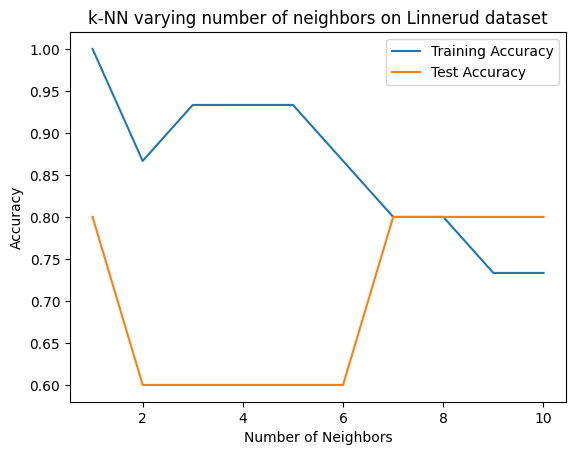

In [7]:
from sklearn.datasets import load_linnerud
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

linnerud = load_linnerud()
X, y = linnerud.data, linnerud.target[:, 0]  # Selecting the first target (Chins) for classification

# Converting the target to a binary classification task
target_class = (y > 160).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, target_class, stratify=target_class, random_state=66)

training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors")
plt.legend()
plt.title("k-NN varying number of neighbors on Linnerud dataset")
plt.show()

In [10]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(linnerud.data, linnerud.target,random_state=0)

clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
print("Prediction on the test set: {}".format(clf.predict(X_test)))

Prediction on the test set: [[154.  32.  52.]
 [167.  34.  56.]
 [162.  35.  56.]
 [157.  32.  46.]
 [162.  34.  56.]]


In [13]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [14]:
print("Predictions for the test set: \n{}".format(knn_regressor.predict(X_test)))

Predictions for the test set: 
[[159.          33.          56.        ]
 [186.66666667  36.          57.33333333]
 [185.          36.33333333  58.        ]
 [179.          34.33333333  49.33333333]
 [180.          35.66666667  59.33333333]]


In [15]:
print("R^2 on the test set: {:.2f}".format(knn_regressor.score(X_test,y_test)))

R^2 on the test set: -0.57


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

In [17]:
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_:{}".format(lr.intercept_))

lr.coef_:[[-2.55388075e+00 -1.87334813e-01  1.55632934e-01]
 [-3.25317265e-01 -3.72155297e-02  3.22483661e-02]
 [ 4.66624875e-01 -3.84735037e-03 -2.35434971e-03]]
lr.intercept_:[221.27779424  41.8405461   51.37162613]


In [18]:
print("Correctness on the train set: {:.2f}".format(lr.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lr.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.24


In [19]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
ridge10 = Ridge(alpha=10).fit(X_train,y_train)

In [20]:
print("Correctness on the train set: {:.2f}".format(ridge.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.23


In [21]:
print("Correctness on the train set: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge01.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.24


In [22]:
print("Correctness on the train set: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(ridge10.score(X_test,y_test)))

Correctness on the train set: 0.38
Correctness on the test set: -1.13


In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso00001 = Lasso(alpha=0.00001, max_iter=100000).fit(X_train, y_train)


In [24]:
print("Correctness on the train set: {:.2f}".format(lasso.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso.coef_ != 0)))

Correctness on the train set: 0.38
Correctness on the test set: -0.98
Number of the used features: 9


In [25]:
print("Correctness on the train set: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso001.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso001.coef_ != 0)))

Correctness on the train set: 0.38
Correctness on the test set: -1.24
Number of the used features: 9


In [26]:
print("Correctness on the train set: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Correctness on the test set: {:.2f}".format(lasso00001.score(X_test,y_test)))   
print("Number of the used features: {}".format(np.sum(lasso00001.coef_ != 0)))

Correctness on the train set: 0.38
Correctness on the test set: -1.24
Number of the used features: 9


In [28]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train,y_train)
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("Correctness on the train set: {:.3f}".format(logreg.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(logreg.score(X_test,y_test)))  
print("Correctness on the train set: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(logreg100.score(X_test,y_test)))   
print("Correctness on the train set: {:.3f}".format(logreg001.score(X_train,y_train)))
print("Correctness on the test set: {:.3f}".format(logreg001.score(X_test,y_test))) 

ValueError: y should be a 1d array, got an array of shape (15, 3) instead.